# SPINE Demo 

This notebook will demonstrate the basic usage of ```spine``` emulator to compute the $z=0$ nonlinear power spectrum for a given cosmology.

In [1]:
from Emulators.main import emulate_pknl
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

## 1. Set the parameters. 
We will use the Quijote fiducial cosmology parameters as an example.

In [2]:
h = 0.6711   
omm = 0.3175  
omb = 0.049 
ns = 0.9624   
s8 = 0.834

## 2. Generate a reference linear $P(k)$ using ```camb```

In [3]:
pars = camb.set_params(H0=h*100, ombh2=omb*h**2, omch2=(omm - omb)*h**2, omk=0, w=-1, ns=ns, As=2.13e-09, DoLensing=False)  
pars.set_matter_power(redshifts=[0], kmax=2)
results = camb.get_results(pars)
pars.NonLinear = model.NonLinear_none
kh, z, pk_lin_camb = results.get_matter_power_spectrum(minkh=1e-2, maxkh=2)

## 3. Calculate the nonlinear $P(k)$ using ```spine```
In this example, we calculate the nonlinear $P(k)$ using the ```spine``` parametrisation. Alternatively, if you wish to use the ```spinex``` parametrisation, this can be done by setting ```model='spinex'```.

In [4]:
knl, nonlinear_pk, nonlinear_nw_pk = emulate_pknl(kh, pk_lin_camb[0], h, omm, omb, ns, s8, model='spine')

## 3. Visualise the results
In this example, we plot the full power spectrum ```nonlinear_pk```. However, we also provide the smoothed no-BAO nonlinear power spectrum. This can be plotted using ```nonlinear_nw_pk```

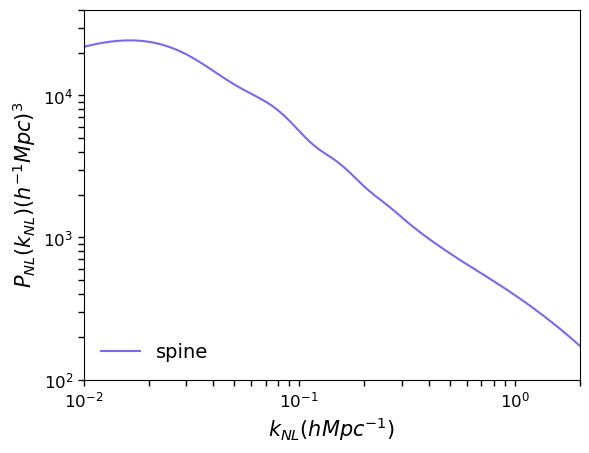

In [5]:
plt.loglog(knl, nonlinear_pk, label='spine', color='mediumslateblue')

# --------- Graph formatting -----------
plt.legend(frameon=False, loc='lower left', prop={'size': 14})
plt.xlabel('$k_{NL} \t (h Mpc^{-1})$', size=15)
plt.ylabel('$P_{NL}(k_{NL}) \t (h^{-1} Mpc)^3$', size=15)
plt.tick_params(axis='both', which='both', labelsize=12,length=4, width=1)
plt.xlim(1e-2, 2)
plt.ylim(1e2, 4e4)
plt.show()